# <center><u>German Credit Data Set</u></center>

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd

#visualizations
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

#metrics and split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')


## 2. Loading Data

In [2]:
df = pd.read_csv('../input/german-credit-data-with-risk/german_credit_data.csv')

## 3. Data Description

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [5]:
df.shape

(1000, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


Saving accounts and Checking account attributes have missing values

In [7]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


## 4. Data Quality Assessment & Statistical Analysis

### 4.1. Filling missing Values

In [8]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

#### 5.1.3. Job Attribute

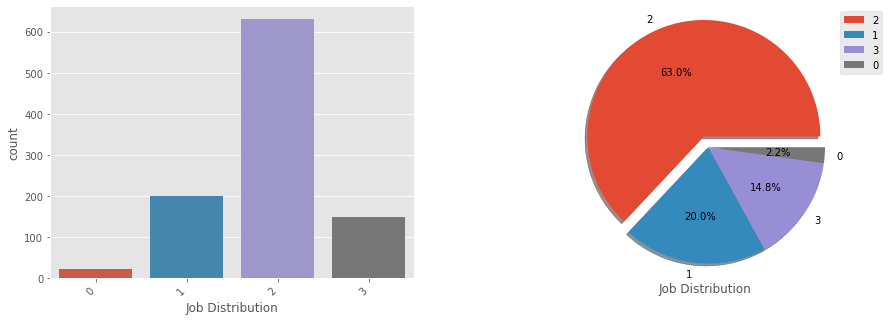

In [26]:
categorical_plots(df.Job,df)

<b>All categorical variables have a relationship with the target variable except 'Purpose' attribute. Among all the related variables saving account has the highest affect on the Risk.</b>

In [43]:
df.drop(columns = ['Purpose'], inplace=True) #Since there is no relation ship with the target variable

In [44]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,male,2,own,little,little,1169,6,1
1,22,female,2,own,little,moderate,5951,48,0
2,49,male,1,own,little,little,2096,12,1
3,45,male,2,free,little,little,7882,42,1
4,53,male,2,free,little,little,4870,24,0


### 12.1. Transforming Features and Target Variable into Array

In [52]:
y = df['Risk']

x = df.drop(columns=['Risk'])
x.head()

,Age,Sex,Job,Credit amount,Duration,free,own,rent,little,moderate,quite rich,rich,little,moderate,rich
0,67,1,2,1169,6,0,1,0,1,0,0,0,1,0,0
1,22,0,2,5951,48,0,1,0,1,0,0,0,0,1,0
2,49,1,1,2096,12,0,1,0,1,0,0,0,1,0,0
3,45,1,2,7882,42,1,0,0,1,0,0,0,1,0,0
4,53,1,2,4870,24,1,0,0,1,0,0,0,1,0,0


#### 12.1.2. Data Normalization

In [53]:
from sklearn.preprocessing import StandardScaler
zscore = StandardScaler()

for i in x.columns:
    df[i] = zscore.fit_transform(df[[i]])

In [54]:
x = x.to_dict(orient='records')

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
x = vec.fit_transform(x).toarray()
x

array([[  67., 1169.,    6., ...,    0.,    0.,    0.],
       [  22., 5951.,   48., ...,    0.,    0.,    0.],
       [  49., 2096.,   12., ...,    0.,    0.,    0.],
       ...,
       [  38.,  804.,   12., ...,    0.,    0.,    0.],
       [  23., 1845.,   45., ...,    0.,    0.,    0.],
       [  27., 4576.,   45., ...,    0.,    0.,    0.]])

In [55]:
y =np.asarray(y)dd

In [58]:
#Defining a function using Yellow brick library to be used for evaluation

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC
from yellowbrick.features import FeatureImportances



def visualize(model):

    
    fig, axes = plt.subplots(1, 3,figsize=(15,5))
    fig.subplots_adjust(wspace=0.7)
    
    visualgrid = [
        #FeatureImportances(model,ax=axes[0][0]),
        ROCAUC(model, ax=axes[1],cmap='RdYlBu'),
        ConfusionMatrix(model,cmap='BuPu', ax=axes[2]),
        ClassificationReport(model, cmap='PuBu',ax=axes[0])
        
    ]

    for viz in visualgrid:
        viz.fit(xtrain, ytrain)
        viz.score(xtest, ytest)
        viz.finalize()

    plt.show()

## 12.6. <u>KNN Algorithm</u>

### Applying KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

#Model Traning
model_knn = KNeighborsClassifier()
model_knn.fit(xtrain,ytrain);

#Prediction
y_pred_knn = model_knn.predict(xtest)
probabilities = model_knn.predict_proba(xtest)
fpr,tpr,thresholds = roc_curve(ytest,probabilities[:,1])

### KNN Evaluation Using Plotly

In [63]:
#print ("\n \033[1m Classification report : \033[0m\n",classification_report(ytest, y_pred_knn))
#print ("\033[1mAccuracy Score   : \033[0m",accuracy_score(ytest, y_pred_knn))
evaluation(y_pred_knn)


  Classification report : 
               precision    recall  f1-score   support

           0       0.38      0.23      0.29        60
           1       0.72      0.84      0.77       140

    accuracy                           0.66       200
   macro avg       0.55      0.53      0.53       200
weighted avg       0.62      0.66      0.63       200

Accuracy Score   :  0.655
Area under curve :  0.535


### KNN Evaluation Using YellowBrick

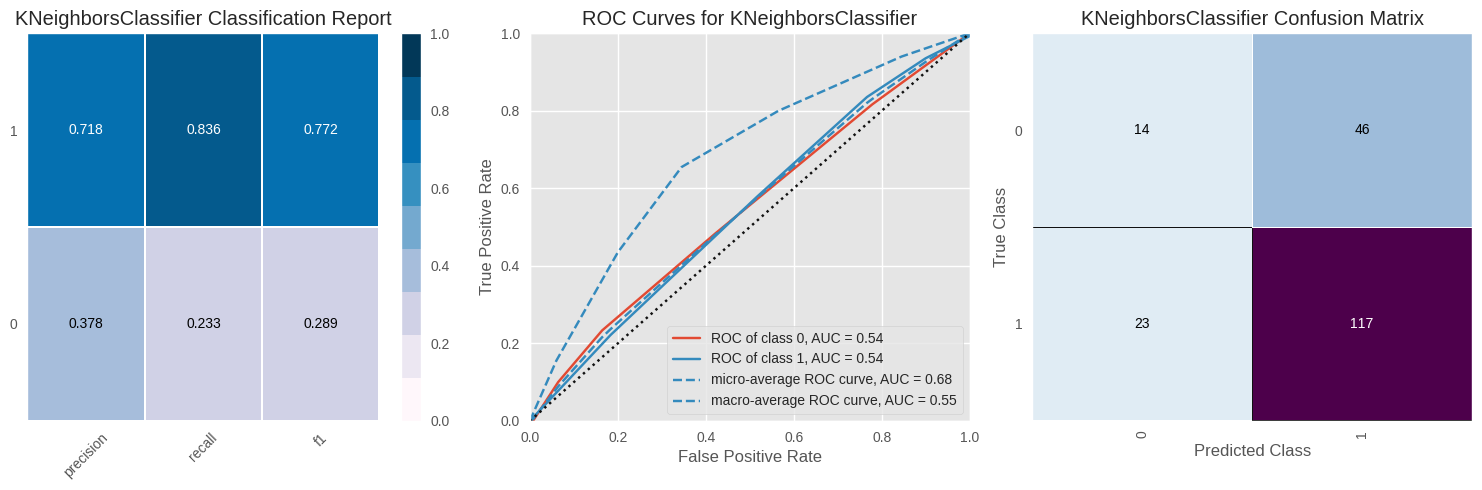

In [64]:
visualize(model_knn)

## 12.7. <u>Naive Bayes Classifier</u>

### Applying Naive Bayes Classifier

In [65]:
from sklearn.naive_bayes import GaussianNB

#Model Training
model_nb = GaussianNB()
model_nb.fit(xtrain, ytrain);

# Model Prediction
y_pred_nb = model_nb.predict(xtest)
probabilities = model_nb.predict_proba(xtest)
fpr,tpr,thresholds = roc_curve(ytest,probabilities[:,1])

### Naive Bayes Evaluation Using Plotly

In [66]:
evaluation(y_pred_nb)


  Classification report : 
               precision    recall  f1-score   support

           0       0.45      0.42      0.43        60
           1       0.76      0.79      0.77       140

    accuracy                           0.68       200
   macro avg       0.61      0.60      0.60       200
weighted avg       0.67      0.68      0.67       200

Accuracy Score   :  0.675
Area under curve :  0.601


### Naive Bayes Evaluation using YellowBrick

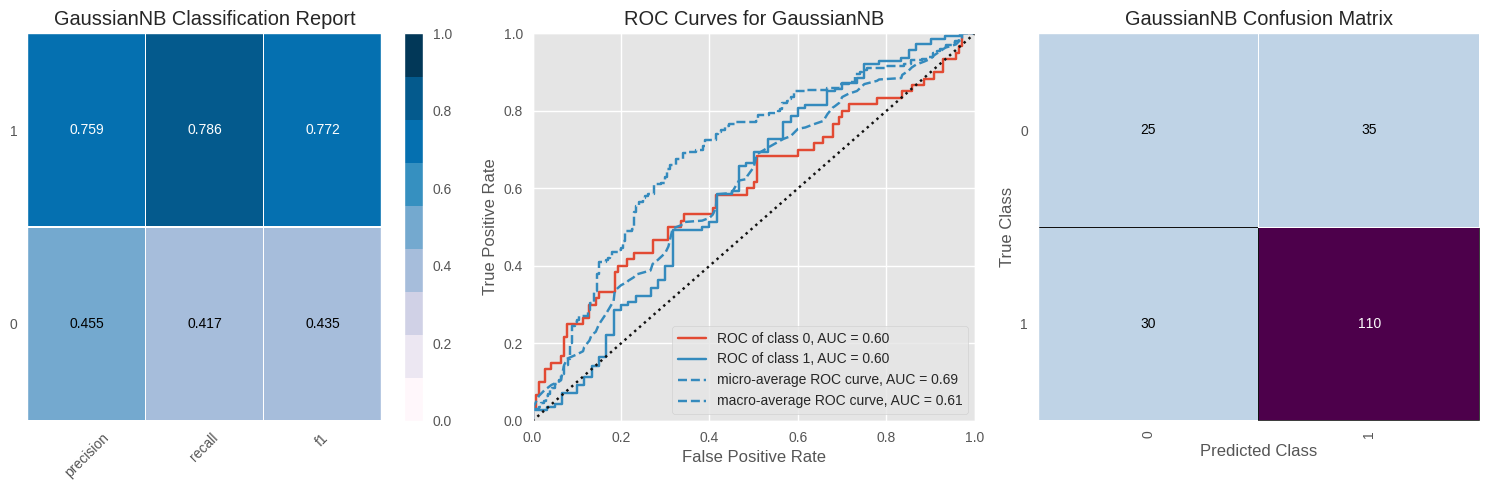

In [67]:
visualize(model_nb)